# Understanding the Problem Statement and Business Case

Today, we live in a world of mis-information and fake news. The goal of this project is to detect fake news using machine learning classification models **(Logistic Regression, Random Forest Classifier, Support Vector Machine and others)**.
Fake news detector is crucial for companies and media to automatically predict whether circulating news is fake or not. I will analyze thousands of news text to detect if it is fake or not.

# Importing Libraries and Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from wordcloud import WordCloud, STOPWORDS


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# load the data
df_true = pd.read_csv("/content/drive/MyDrive/Data Science/Fake News Classification/datasets/True.csv")
df_fake = pd.read_csv("/content/drive/MyDrive/Data Science/Fake News Classification/datasets/Fake.csv")

In [ ]:
# Let's check the ratio and and balance of dataset

print('Total number of true news:',len(df_true))
print('Total number of fake news:',len(df_fake))
print('Ratio of fake news to total number news:',round(len(df_fake) / (len(df_true)+len(df_fake)), 2))

Total number of true news: 21417
Total number of fake news: 23481
Ratio of fake news to total number news: 0.52


In [ ]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

# Exploratory Data Analysis

In [ ]:
# category dict
category = { 0: 'Fake News', 1 : "True News"}

In [ ]:
# add a target class column to indicate whether the news is real or fake
df_true['isfake'] = 1
df_true.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df_fake['isfake'] = 0
df_fake.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
# Concatenate Real and Fake News
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df.drop(columns = ['date'], inplace = True)

In [ ]:
# combine title and text together
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...


In [ ]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

# Data pre-processing

In [ ]:
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
# Apply the function to the dataframe
df['clean'] = df['original'].apply(preprocess)

In [ ]:
# Show original news
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [ ]:
df.head()

,title,text,subject,isfake,original,clean
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon..."


In [ ]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [ ]:
list_of_words

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [ ]:
len(list_of_words)

9277072

In [ ]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

108705

In [ ]:
# join the words into a string
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))
df.head()

,title,text,subject,isfake,original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...


In [ ]:
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

In [ ]:
df['length'] = df['original'].apply(len)

# Visualisation of Cleaned up Dataset

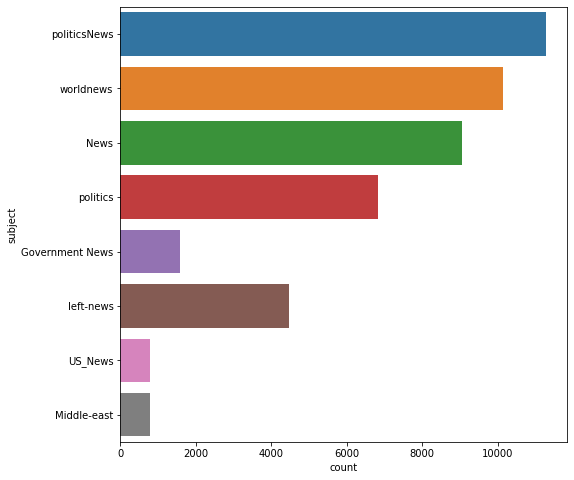

In [ ]:
# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

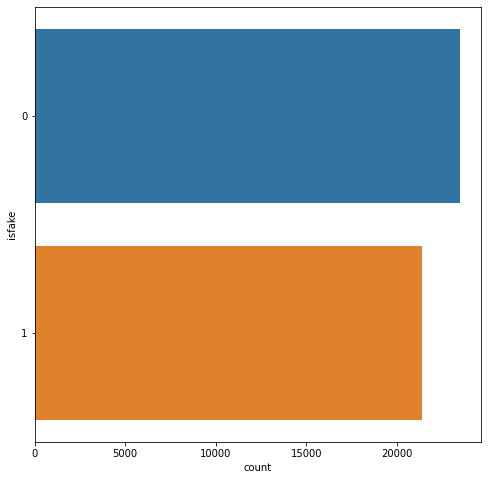

In [ ]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5619bb5a20>,
      dtype=object)

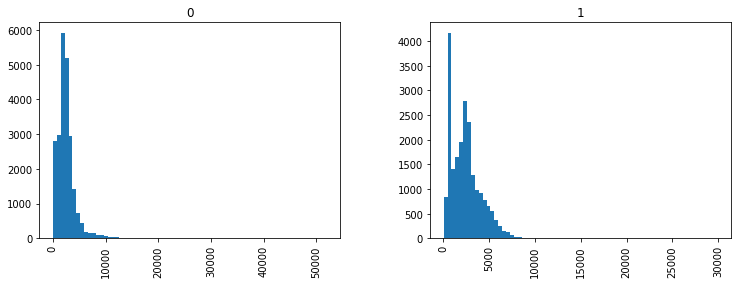

In [ ]:
# Let's plot the length of true and fake news to compare them
df.hist(column='length', by='isfake', bins=70,figsize=(12,4))

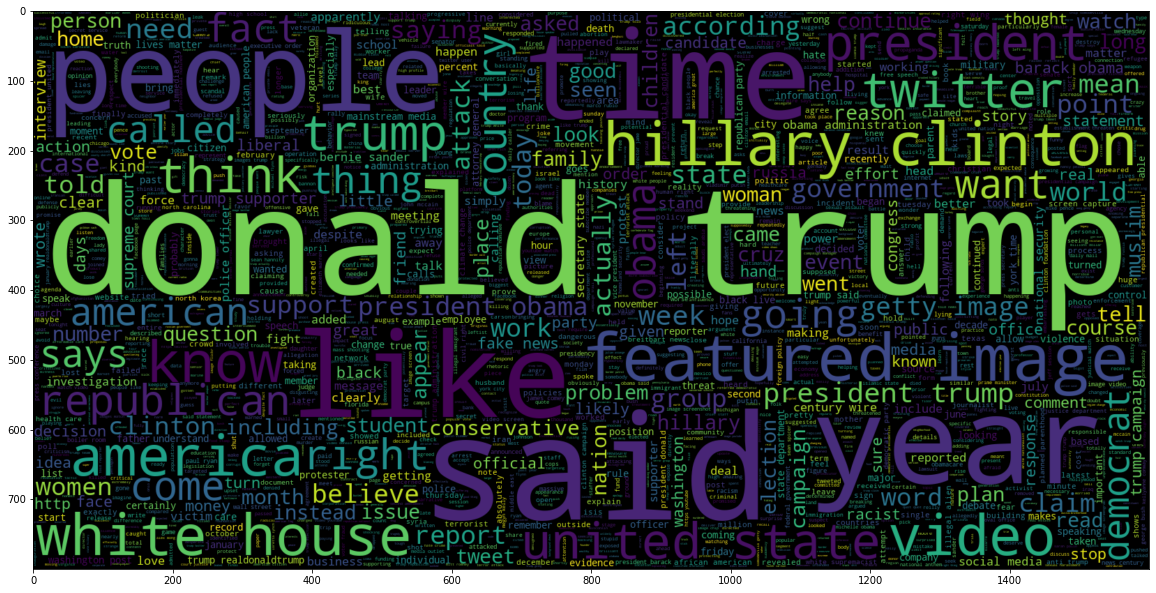

In [ ]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

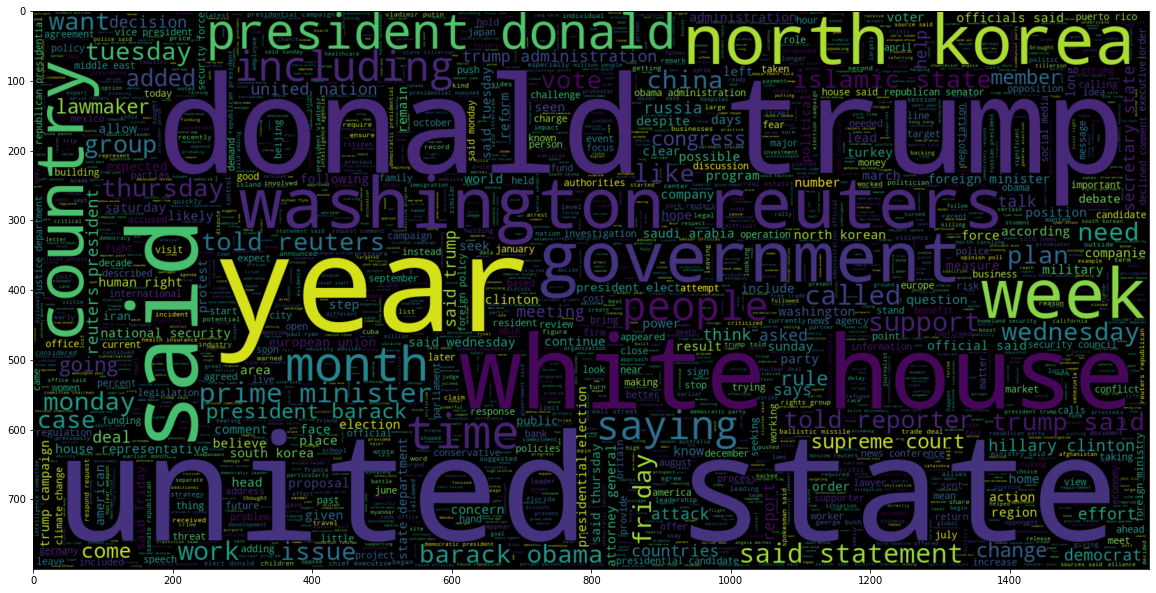

In [ ]:
# plot the word cloud for text that is True
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

# Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
vectorizer = CountVectorizer().fit(df.clean_joined)

In [ ]:
# lets see how many different words we have
print(len(vectorizer.vocabulary_))

108705


In [ ]:
# lets check one of the news
news = df.original[5]
print(news)

White House, Congress prepare for talks on spending, immigration WEST PALM BEACH, Fla./WASHINGTON (Reuters) - The White House said on Friday it was set to kick off talks next week with Republican and Democratic congressional leaders on immigration policy, government spending and other issues that need to be wrapped up early in the new year. The expected flurry of legislative activity comes as Republicans and Democrats begin to set the stage for midterm congressional elections in November. President Donald Trump’s Republican Party is eager to maintain control of Congress while Democrats look for openings to wrest seats away in the Senate and the House of Representatives. On Wednesday, Trump’s budget chief Mick Mulvaney and legislative affairs director Marc Short will meet with Senate Majority Leader Mitch McConnell and House Speaker Paul Ryan - both Republicans - and their Democratic counterparts, Senator Chuck Schumer and Representative Nancy Pelosi, the White House said. That will be 

In [ ]:
#Let's see how that news is transformed in CountVectorizer
vec5 = vectorizer.transform([news]) 
print(vec5)
print(vec5.shape)

  (0, 656)	2
  (0, 847)	1
  (0, 872)	1
  (0, 1005)	1
  (0, 1248)	1
  (0, 1436)	1
  (0, 1633)	1
  (0, 1750)	1
  (0, 4492)	1
  (0, 4504)	1
  (0, 5054)	1
  (0, 5335)	1
  (0, 6271)	1
  (0, 6329)	1
  (0, 7362)	1
  (0, 8101)	1
  (0, 8310)	1
  (0, 8368)	1
  (0, 9463)	2
  (0, 9489)	1
  (0, 10930)	4
  (0, 11011)	1
  (0, 11595)	1
  (0, 12034)	1
  (0, 12440)	2
  :	:
  (0, 96461)	1
  (0, 96877)	1
  (0, 97437)	1
  (0, 97919)	11
  (0, 98721)	2
  (0, 99719)	1
  (0, 99891)	1
  (0, 100122)	1
  (0, 102184)	1
  (0, 103329)	2
  (0, 103445)	1
  (0, 103450)	2
  (0, 103622)	1
  (0, 104030)	1
  (0, 104044)	2
  (0, 104047)	1
  (0, 104312)	1
  (0, 104625)	5
  (0, 104887)	1
  (0, 105705)	3
  (0, 105906)	1
  (0, 105947)	1
  (0, 106026)	1
  (0, 106960)	1
  (0, 107394)	1
(1, 108705)


In [ ]:
# here we create a new variable to hold the transformed versions of the news. 
news_vec = vectorizer.transform(df.clean_joined)

# TD-IDF Transformer

In [ ]:
# TF-IDF stands for term frequency-inverse document frequency, 
# and the tf-idf weight is a weight often used in information retrieval and text mining. 
# here we fit our bag of words (bow) to TFIDF transformer
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(news_vec)

In [ ]:
tfidf5 = tfidf_transformer.transform(vec5)
print(tfidf5)

  (0, 107394)	0.036005959421288376
  (0, 106960)	0.020256525714060794
  (0, 106026)	0.03324953883820115
  (0, 105947)	0.07759662468811811
  (0, 105906)	0.0619373223672541
  (0, 105705)	0.08015790665056982
  (0, 104887)	0.07302813318531406
  (0, 104625)	0.11375243352435671
  (0, 104312)	0.038531881255093305
  (0, 104047)	0.04139288171571834
  (0, 104044)	0.047656261400889605
  (0, 104030)	0.02640412405111467
  (0, 103622)	0.021618852766308958
  (0, 103450)	0.06441671590463281
  (0, 103445)	0.025849358291375114
  (0, 103329)	0.07182178635257998
  (0, 102184)	0.03840773463205071
  (0, 100122)	0.021803993337477328
  (0, 99891)	0.0807041057446502
  (0, 99719)	0.039228148302509445
  (0, 98721)	0.05284910996756988
  (0, 97919)	0.17424528437065687
  (0, 97437)	0.046616459576864146
  (0, 96877)	0.05154417611493475
  (0, 96461)	0.01961830158655413
  :	:
  (0, 12440)	0.07660651369449976
  (0, 12034)	0.04934900188122332
  (0, 11595)	0.04138034378217617
  (0, 11011)	0.0637762144016045
  (0, 10930)	

In [ ]:
#here we transform our news_vec 
news_tfidf = tfidf_transformer.transform(news_vec)
print(news_tfidf.shape)

(44898, 108705)


# Train Test Split

In [ ]:
# Here we split our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size=0.3)

print('Train size:',len(X_train), '\nTest size:', len(X_test), '\ntotal lenght of the dataset:', len(df))

Train size: 31428 
Test size: 13470 
total lenght of the dataset: 44898


# Building Classification Models

## 1.Naive Bayes Classifier 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Naive Bayes classifier pipeline
NB_pipeline = Pipeline([
    ('bow', CountVectorizer()), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to TF-IDF scores
    ('classifier', MultinomialNB()), # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
# we fit the data to the model pipeline
NB_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
# we make predictions from NB classifier
NB_predictions = NB_pipeline.predict(X_test)

In [ ]:
# importing metrics
from sklearn.metrics import classification_report

In [ ]:
# printing classification report
print(classification_report(NB_predictions,y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7145
           1       0.93      0.94      0.93      6325

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, NB_predictions)

0.9343726800296956

## 2.Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Decision Tree classifier pipeline
DT_pipeline = Pipeline([
    ('bow', CountVectorizer()), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to TF-IDF scores
    ('classifier', DecisionTreeClassifier()), # train on TF-IDF vectors 
])

In [ ]:
DT_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
       

In [ ]:
DT_predictions = DT_pipeline.predict(X_test)

In [ ]:
# printing classification report
print(classification_report(DT_predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7075
           1       0.99      0.99      0.99      6395

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [ ]:
accuracy_score(y_test, DT_predictions)

0.9949517446176689

## 3.Support Vector Machine Classifier




In [ ]:
from sklearn.svm import SVC

In [ ]:
SVC_pipeline = Pipeline([
    ('bow', CountVectorizer()), #strings to token integer counts
    ('tfidf', TfidfTransformer()), #integer counts to TF-IDF scores
    ('classifier', SVC()), # train on TF-IDF vectors 
])

In [ ]:
SVC_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

In [ ]:
SVC_predictions = SVC_pipeline.predict(X_test)

In [ ]:
print(classification_report(SVC_predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7071
           1       0.99      0.99      0.99      6399

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [ ]:
accuracy_score(y_test, SVC_predictions)

0.9909428359317001

## 4.K-Nearest Neighbors (K-NN) Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN_pipeline = Pipeline([
    ('bow', CountVectorizer()), #strings to token integer counts
    ('tfidf', TfidfTransformer()), #integer counts to TF-IDF scores
    ('classifier', KNeighborsClassifier()), # train on TF-IDF vectors 
])

In [ ]:
KNN_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,

In [ ]:
KNN_predictions = KNN_pipeline.predict(X_test)

In [ ]:
print(classification_report(KNN_predictions,y_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      6310
           1       0.92      0.82      0.87      7160

    accuracy                           0.87     13470
   macro avg       0.87      0.87      0.87     13470
weighted avg       0.88      0.87      0.87     13470



In [ ]:
accuracy_score(y_test, KNN_predictions)

0.8695619896065331

## 5.Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Log_pipeline = Pipeline([
    ('bow', CountVectorizer()), #strings to token integer counts
    ('tfidf', TfidfTransformer()), #integer counts to TF-IDF scores
    ('classifier', LogisticRegression()), # train on TF-IDF vectors 
])

In [ ]:
Log_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [ ]:
Log_predictions = Log_pipeline.predict(X_test)

In [ ]:
print(classification_report(Log_predictions,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7054
           1       0.99      0.98      0.98      6416

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



In [ ]:
accuracy_score(y_test, Log_predictions)

0.9849294729027468

## 6.Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_pipeline = Pipeline([
    ('bow', CountVectorizer()), #strings to token integer counts
    ('tfidf', TfidfTransformer()), #integer counts to TF-IDF scores
    ('classifier', RandomForestClassifier()), # train on TF-IDF vectors 
])

In [ ]:
RF_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                

In [ ]:
RF_predictions = RF_pipeline.predict(X_test)

In [ ]:
print(classification_report(RF_predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7048
           1       0.99      0.99      0.99      6422

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [ ]:
accuracy_score(y_test, RF_predictions)

0.9904231625835189

## 7.XGBoost Classifier

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XGB_pipeline = Pipeline([
    ('bow', CountVectorizer()), #strings to token integer counts
    ('tfidf', TfidfTransformer()), #integer counts to TF-IDF scores
    ('classifier', XGBClassifier()), # train on TF-IDF vectors 
])

In [ ]:
XGB_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing

In [ ]:
XGB_predictions = XGB_pipeline.predict(X_test)

In [ ]:
print(classification_report(XGB_predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7044
           1       1.00      0.99      1.00      6426

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [ ]:
accuracy_score(y_test, XGB_predictions)

0.9960653303637713

## 8.LightGBM Classifier

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
LightGBM_pipeline = Pipeline([
    ('bow', CountVectorizer()), #strings to token integer counts
    ('tfidf', TfidfTransformer()), #integer counts to TF-IDF scores
    ('classifier', LGBMClassifier()), # train on TF-IDF vectors 
])

In [ ]:
LightGBM_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split

In [ ]:
LightGBM_predictions = LightGBM_pipeline.predict(X_test)

In [ ]:
print(classification_report(LightGBM_predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7056
           1       1.00      1.00      1.00      6414

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [ ]:
accuracy_score(y_test, LightGBM_predictions)

0.997253155159614

## 9.AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
AB_pipeline = Pipeline([
    ('bow', CountVectorizer()), #strings to token integer counts
    ('tfidf', TfidfTransformer()), #integer counts to TF-IDF scores
    ('classifier', AdaBoostClassifier()), # train on TF-IDF vectors 
])

In [ ]:
AB_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=1.0, n_estimators=5

In [ ]:
AB_predictions = AB_pipeline.predict(X_test)

In [ ]:
print(classification_report(AB_predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7049
           1       1.00      0.99      1.00      6421

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [ ]:
accuracy_score(y_test, AB_predictions)

0.9952487008166295

# Model Selection / Comparison of all Models

1. **Naive Bayes Classifier:** 93.44%
2. **Decision Tree Classifier:** 99.49%
3. **Support Vector Machine Classifier:** 99.09%
4. **K-Nearest Neighbors (K-NN):** 86.95%
5. **Logistic Regression Classifier:** 98.49%
6. **Random Forest Classifier:** 99.04%
7. **XGBoost Classifier:** 99.60%
8. **LightGBM Classifier:** 99.72%
9. **AdaBoost Classifier:** 99.52%

In conclusion, the machine learning classification models performed well. We received accuracy rate more than 90% except **K-Nearest Neighbors**. Almost all of the models have closer accuracy score to each other. **LightGBM Classifier** gave the highest accuracy score **(99.7%)**. 